In [1]:
import dataModule as dm
from sklearn.model_selection import train_test_split
from sklearn import svm
import pandas as pd

In [2]:
dataSet = dm.dataFunction()

In [3]:
dataSet.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [4]:
X = dataSet.drop(['Loan_Status'], axis = 1)

In [5]:
X['Gender'].value_counts().plot.bar()

In [6]:
y = dataSet['Loan_Status']

In [7]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban


In [8]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
X = pd.get_dummies(X)

In [10]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [11]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
X_train.shape

(414, 20)

In [14]:
import pandas as pd

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
c_values = [0.001, 0.01, 0.1, 1]

In [17]:
accuracy_array = []

### Support vactor machine

In [18]:
for i in c_values:
    clf = svm.SVC(gamma='auto', C = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    accuracy_array.append(dm.Accuracy(conf_mat))  
    print(conf_mat)

[[ 0 30]
 [ 0 74]]
[[ 0 30]
 [ 0 74]]
[[ 0 30]
 [ 0 74]]
[[ 1 29]
 [ 0 74]]


In [19]:
accuracy_array

[0.7115384615384616,
 0.7115384615384616,
 0.7115384615384616,
 0.7211538461538461]

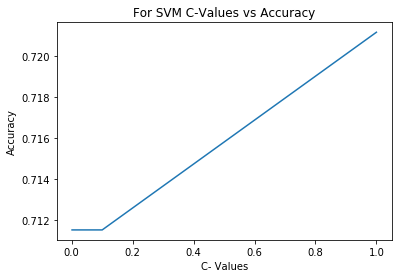

In [20]:
import matplotlib.pyplot as plt 
plt.plot(c_values, accuracy_array)
plt.xlabel("C- Values")
plt.ylabel("Accuracy")
plt.title("For SVM C-Values vs Accuracy")
plt.show()

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
accuracy_array = []

In [23]:
for i in c_values:
    clf = LogisticRegression(C = i,  solver='lbfgs', max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    accuracy_array.append(dm.Accuracy(conf_mat))
    
    print(conf_mat)

[[ 0 30]
 [ 1 73]]
[[ 0 30]
 [ 0 74]]
[[12 18]
 [ 6 68]]
[[14 16]
 [ 4 70]]


In [24]:
accuracy_array

[0.7019230769230769,
 0.7115384615384616,
 0.7692307692307693,
 0.8076923076923077]

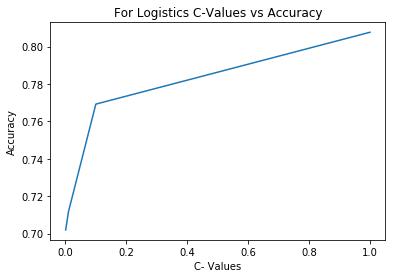

In [25]:
plt.plot(c_values, accuracy_array)
plt.xlabel("C- Values")
plt.ylabel("Accuracy")
plt.title("For Logistics C-Values vs Accuracy")
plt.show()

### Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
max_depth_arr = [2, 4, 6, 8, 10]

In [28]:
max_depth_arr

[2, 4, 6, 8, 10]

In [29]:
accuracy_array = []

In [30]:
'''for i in max_depth_arr:
    clf = DecisionTreeClassifier(random_state=0, max_depth = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    accuracy_array.append(dm.Accuracy(conf_mat))
    print(conf_mat)'''

'for i in max_depth_arr:\n    clf = DecisionTreeClassifier(random_state=0, max_depth = i)\n    clf.fit(X_train, y_train)\n    y_pred = clf.predict(X_test)\n    conf_mat = confusion_matrix(y_test, y_pred)\n    accuracy_array.append(dm.Accuracy(conf_mat))\n    print(conf_mat)'

In [38]:
import pickle
import json

In [45]:
clf = DecisionTreeClassifier(random_state=0, max_depth = i)
clf.fit(X_train, y_train)
with open('modal2.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [46]:
with open('modal2.pkl', 'rb') as r:
        model = pickle.load(r)
dict_ = {'Gender_Female':0, 'Gender_Male':1, 'Married_No': 0, 'Married_Yes':1,
         'Dependents_0':0, 'Dependents_1':1, 'Dependents_2': 0, 'Dependents_3+':0,
         'Education_Graduate':1, 'Education_Not Graduate': 0, 'Self_Employed_No':1,
         'Self_Employed_Yes':0,
       'ApplicantIncome':4583, 'CoapplicantIncome':1508.0, 'LoanAmount':128.0,
       'Loan_Amount_Term':360.0, 'Credit_History':1.0, 'Property_Area_Rural':1,
        'Property_Area_Semiurban':0, 'Property_Area_Urban':0}
data = pd.DataFrame([dict_]) 
model.predict(data)[0]

'Y'

In [33]:
accuracy_array

[]

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

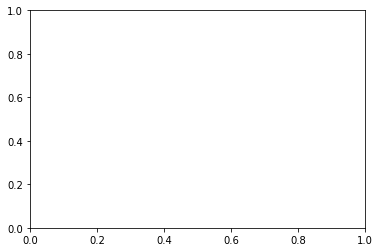

In [34]:
plt.plot(max_depth_arr, accuracy_array)
plt.xlabel("Max- depth")
plt.ylabel("Accuracy")
plt.title("For decision tree Max-depth vs Accuracy")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
max_features_arr = [4, 8, 12 , "auto"]

In [ ]:
accuracy_array = []

In [ ]:
for i in max_features_arr:
    clf = RandomForestClassifier(n_estimators = 20, max_features=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    accuracy_array.append(dm.Accuracy(conf_mat))
    print(conf_mat)

In [ ]:
accuracy_array

In [ ]:
plt.plot(max_features_arr, accuracy_array)
plt.xlabel("Max- features")
plt.ylabel("Accuracy")
plt.title("For Random Forest Max-features vs Accuracy")
plt.show()